# Introduction to Seaborn

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# In ra danh sách các dataset có sẵn trong seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Styling

In [4]:
# Apply the default theme
sns.set_theme()

## Numerical Plots

* **Distribution**: Histogram, KDE (Kernel Density Estimate), Displot
  - Histogram: biểu đồ tần số hiển thị phân phối của dữ liệu liên tục
  - KDE: ước tính mật độ xác suất bằng đường cong liên tục
  - Displot: kết hợp histogram và KDE để hiển thị phân phối chi tiết

* **Bar Plot**: hiển thị giá trị trung bình/tổng của một biến số theo các nhóm của biến phân loại
* **Count Plot**: đếm số lần xuất hiện của mỗi giá trị trong một biến phân loại
* **Box Plot**: mô tả phân phối dữ liệu số thông qua các phần tư (min, Q1, median, Q3, max) và xác định outliers
* **Facet Plot**: tạo lưới 2D của các đồ thị con được xác định bởi các biến tạo hàng và cột, giúp so sánh nhiều nhóm dữ liệu
* **Joint Plot**: hiển thị phân phối kết hợp giữa hai biến cùng với phân phối lề của mỗi biến
* **Pair Plot**: tạo ma trận đồ thị so sánh tất cả các cặp biến số, thường được phân nhóm theo một biến phân loại
* **Heat Map**: biểu diễn cường độ của dữ liệu bằng màu sắc trên hai hoặc ba chiều, thường dùng để hiển thị ma trận tương quan

### Distribution Plot
* Univariate distribution of observations

In [5]:
# Load dataset 'tips'
tips_df = sns.load_dataset("tips")

In [6]:
# Xem 5 dòng đầu của dataset
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


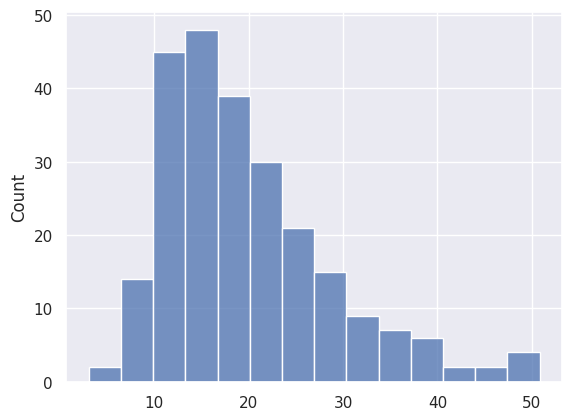

In [7]:
# Vẽ histogram cho cột "total_bill"
sns.histplot(data=tuple(tips_df["total_bill"]));

In [8]:
# Đếm số lần xuất hiện của từng giá trị trong "total_bill" và sắp xếp giảm dần
tips_df["total_bill"].value_counts().sort_values(ascending=False)


total_bill
13.42    3
21.01    2
20.69    2
10.33    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

### KDE Plot
* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
* KDE represents the data using a continuous probability density curve in one or more dimensions

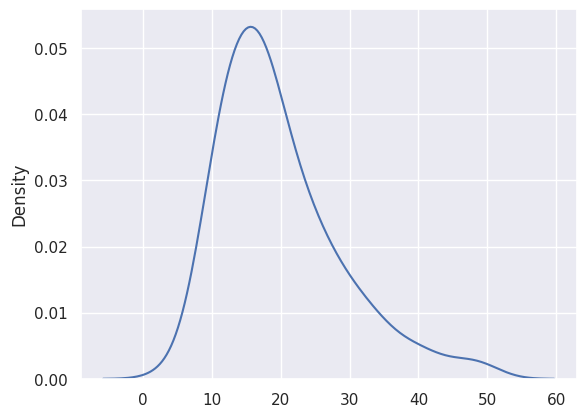

In [9]:
# Vẽ KDE plot cho "total_bill"
sns.kdeplot(data=tuple(tips_df["total_bill"]));


### Displot

* Informative distributional summaries
* Statistical analyses require knowledge about the distribution of variables in your dataset. 
* The seaborn function `displot()` supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation

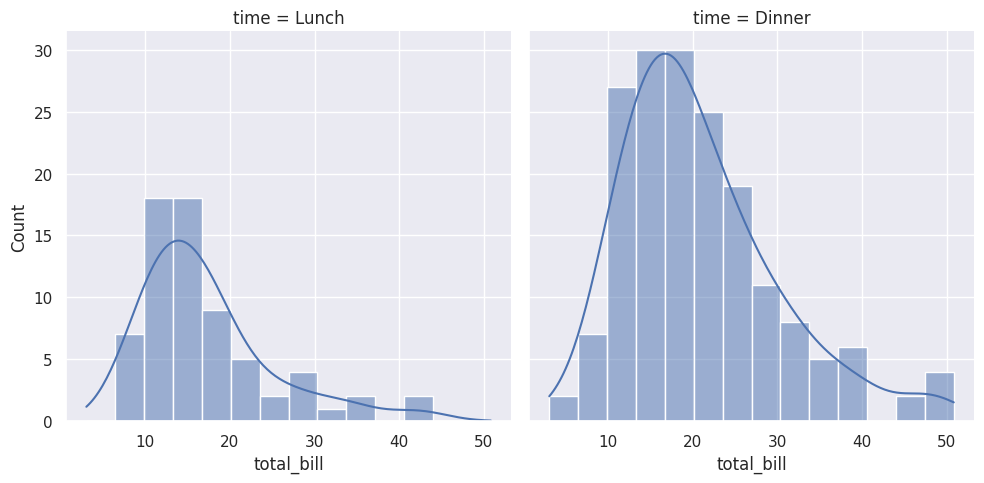

In [10]:
# Vẽ distribution plot với nhiều cột và KDE
sns.displot(data=tips_df, x="total_bill", col="time", kde=True);

## Categorical Plots
### Bar Plots

In [11]:
# Xem lại dữ liệu
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


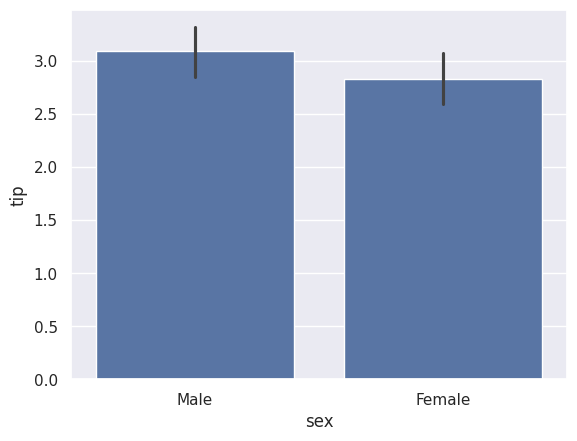

In [12]:
# Vẽ bar plot: trung bình "tip" theo "sex"
sns.barplot(data=tips_df, x="sex", y="tip", estimator=np.mean);

### Count Plot

In [13]:
# Đếm số lượng theo "sex"
tips_df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

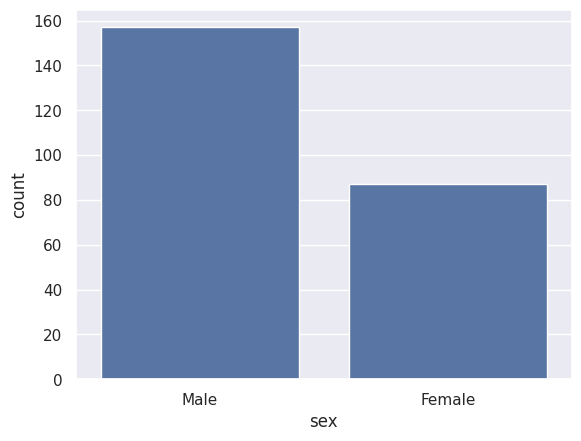

In [14]:
# Vẽ count plot cho "sex"
sns.countplot(data=tips_df, x="sex");

### Box Plot
Box Plot is a good indication of how the values in the data are spread out ("minium", first quartile (Q1), median, third quartile (Q3), and “maximum”)
* Identify outliers
* Check if data is symmetrical
* Determine how tightly data is grouped

Resource: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

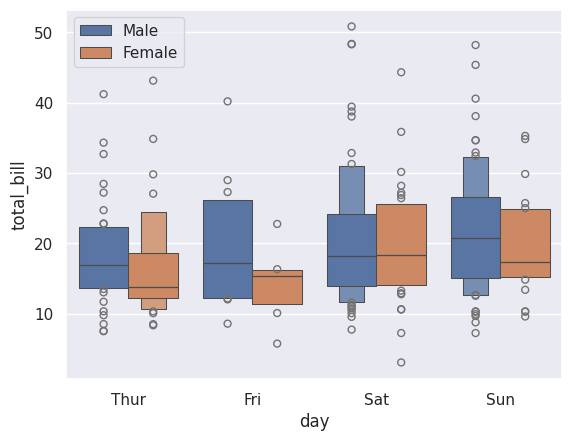

In [15]:
# Vẽ box plot: "total_bill" theo "day", phân nhóm theo "sex"
sns.boxenplot(data=tips_df, x="day", y="total_bill", hue="sex")
plt.legend(loc=0);

### Facet Grid
* FacetGrid can be drawn with up to three dimensions: `row`, `col`, and `hue`.
* The main approach for visualizing data on this grid is with the FacetGrid.map() method. 

In [16]:
# Xem lại dữ liệu
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


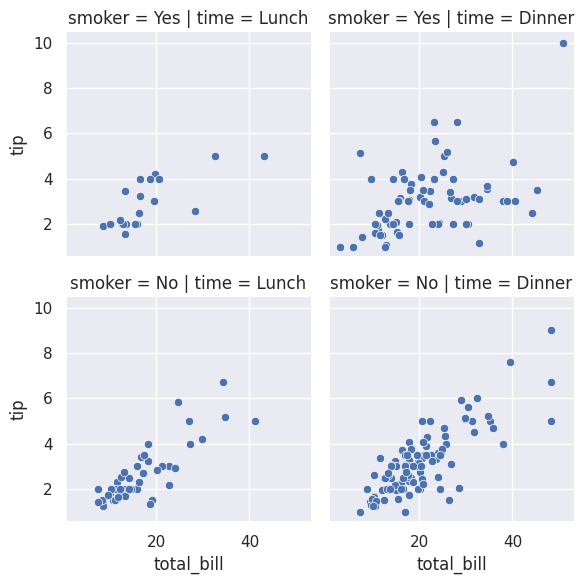

In [17]:
# Tạo FacetGrid với row="smoker", col="time"
# Sau đó vẽ scatter plot cho 'total_bill' vs 'tip'
tips_fg = sns.FacetGrid(
    data=tips_df, row="smoker", col="time"
)  # Create a class instance of Facet Grid class
tips_fg.map(sns.scatterplot, "total_bill", "tip");

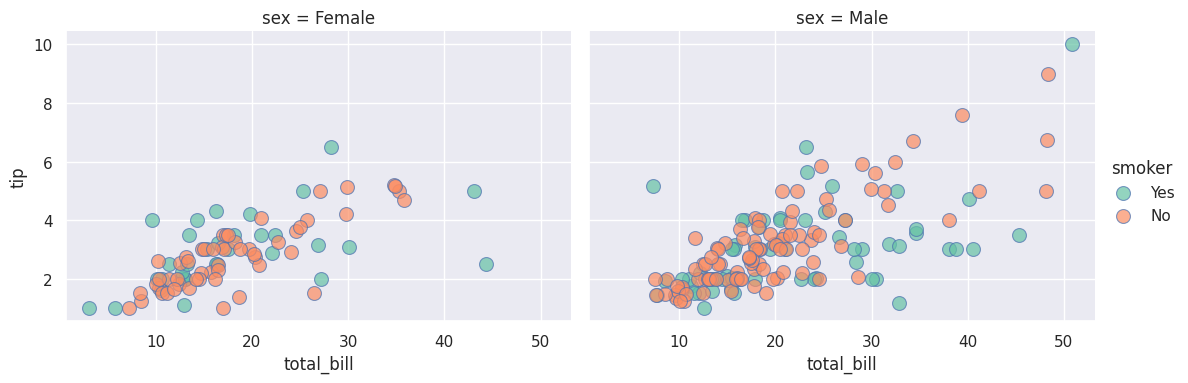

In [46]:
# Tạo FacetGrid nâng cao với nhiều tùy chỉnh
# col="sex", hue="smoker", với palette và custom options
kws = dict(s=100, edgecolor="b", alpha=0.7)

new_fg = sns.FacetGrid(
    data=tips_df,
    col="sex",
    hue="smoker",
    col_order=["Female", "Male"],
    palette="Set2",
    height=4,
    aspect=1.4,
)
new_fg.map(sns.scatterplot, "total_bill", "tip", **kws)

new_fg.add_legend();

### Joint Plot
* `joint` distribution between two variables along with each variable’s marginal distribution

In [48]:
# Load dataset 'penguins'
penguins_df = sns.load_dataset("penguins")

In [49]:
# Xem dữ liệu penguins
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


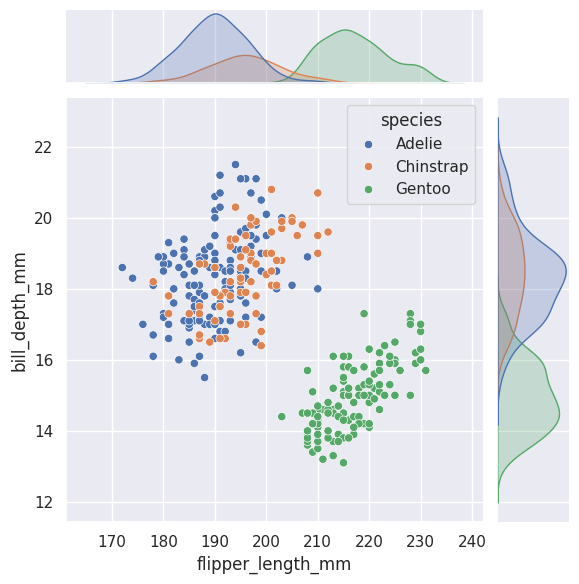

In [51]:
# Vẽ joint plot: "flipper_length_mm" vs "bill_length_mm", phân theo "species"
sns.jointplot(penguins_df, x="flipper_length_mm", y="bill_depth_mm", hue="species");

### Pair Plots

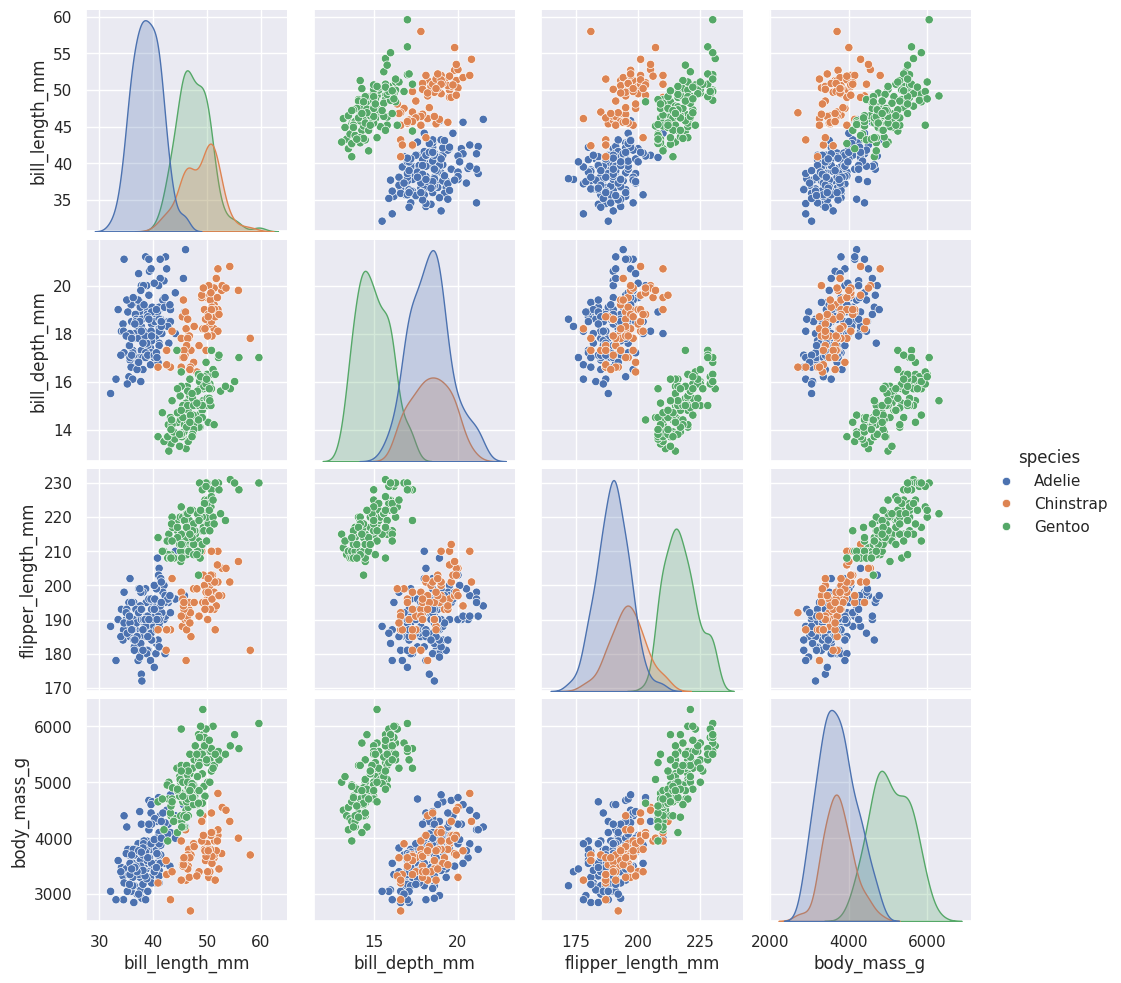

In [ ]:
# Vẽ pair plot cho tất cả các cột số, phân theo "species"
sns.pairplot(penguins_df, hue="species");

### Heatmaps
Describing density or intensity of variables, visualize patterns, variance, and even anomalies.

In [ ]:
# Load dataset "flights"
flights_df = sns.load_dataset("flights")

In [54]:
# Xem dữ liệu flights
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# Tạo pivot table: index='month', columns='year', values='passengers'
flights = pd.pivot_table(
    flights_df, index="month", columns="year", values="passengers", observed=False
)

In [59]:
# Xem kết quả pivot table
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


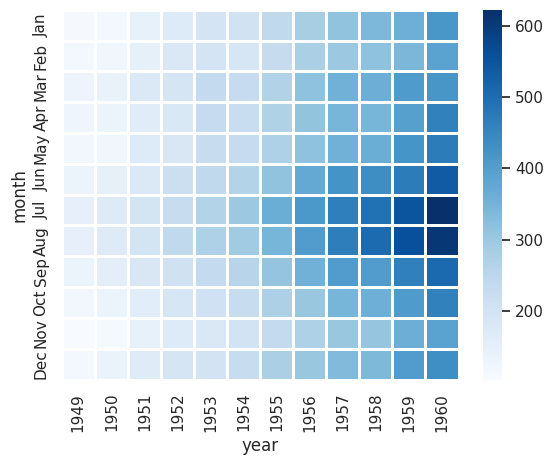

In [ ]:
# Vẽ heatmap với cmap='Blues', linecolor và linewidths
sns.heatmap(flights, cmap="Blues", linecolor="white", linewidths=1);